## Student Name: Liyanze Liu
## Student Number: 1009172324

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=267834a9649fb89a7999be7d5f490fba96f440cfe99d69e08939363e1cbe58d6
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [4]:
# Loading the data from an Excel
a2_data = 'INF2178_A2_data.xlsx'
a2_df = pd.read_excel(a2_data)

# Displaying the first few rows to the a2_data
a2_df.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 95.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 92.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 88.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 86.0% of the points cannot be plac

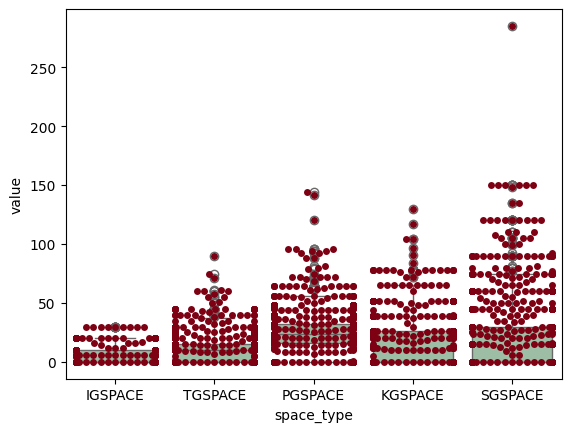

In [5]:
# Reshape the dataframe suitable for statsmodels package
df_melt = pd.melt(a2_df, id_vars=['AUSPICE', 'ward', 'subsidy', 'cwelcc_flag'],
                  value_vars=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE'],
                  var_name='space_type', value_name='value')

# Replace column names
df_melt.columns = ['AUSPICE', 'ward', 'subsidy', 'cwelcc_flag', 'space_type', 'value']

# Generate a boxplot to see the data distribution by space type
ax = sns.boxplot(x='space_type', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="space_type", y='value', data=df_melt, color='#7d0013')
plt.show()

In [6]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(space_type)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(space_type)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(space_type),4.0,2.821233e+05,70530.816839,188.190768,4.517383e-151
Residual,5310.0,1.990101e+06,374.783617,NaN,NaN


In [7]:
# Post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='space_type', anova_model='value ~ C(space_type)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,IGSPACE,TGSPACE,7.703669,5.412308,9.995029,12.974001,0.001000
1,IGSPACE,PGSPACE,20.362183,18.070822,22.653543,34.292619,0.001000
2,IGSPACE,KGSPACE,10.361242,8.069881,12.652602,17.449707,0.001000
3,IGSPACE,SGSPACE,17.764817,15.473456,20.056177,29.918310,0.001000
4,TGSPACE,PGSPACE,12.658514,10.367153,14.949874,21.318618,0.001000
5,TGSPACE,KGSPACE,2.657573,0.366213,4.948933,4.475706,0.013527
6,TGSPACE,SGSPACE,10.061148,7.769787,12.352508,16.944309,0.001000
7,PGSPACE,KGSPACE,10.000941,7.709580,12.292301,16.842912,0.001000
8,PGSPACE,SGSPACE,2.597366,0.306006,4.888726,4.374309,0.017028
9,KGSPACE,SGSPACE,7.403575,5.112214,9.694935,12.468603,0.001000


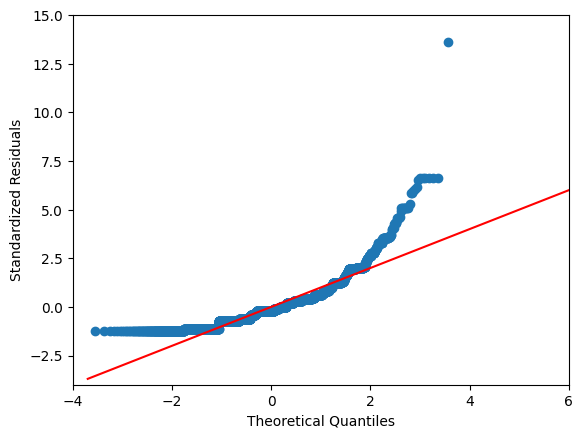

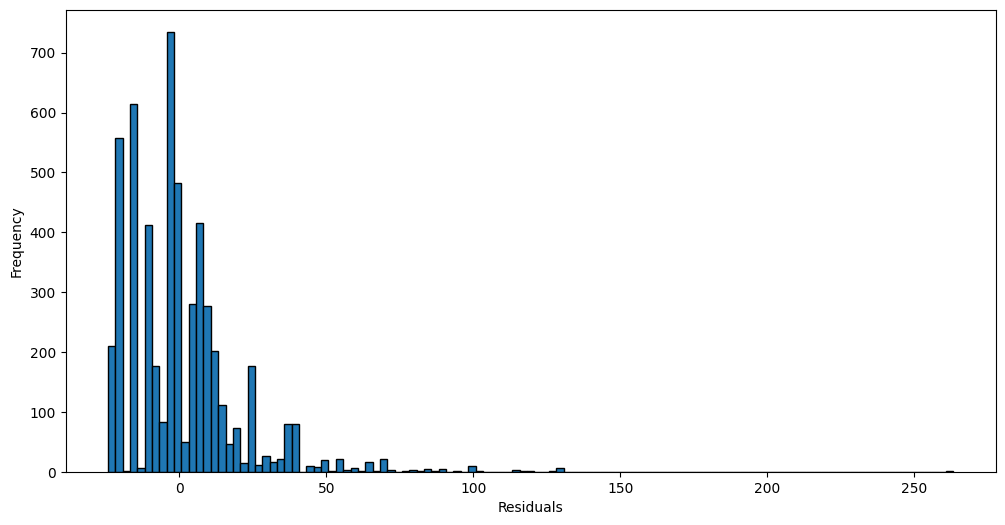

In [8]:
# Checking model diagnostics
# Assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlim(-4, 6)
plt.ylim(-4, 15)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Histogram
plt.figure(figsize=(12, 6))
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [9]:
# Assumption 1: Residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
if pvalue < 0.001:
    print(f"Shapiro-Wilk test statistic: {w}, p-value: <0.001")
else:
    print(f"Shapiro-Wilk test statistic: {w}, p-value: {pvalue}")

Shapiro-Wilk test statistic: 0.8427014350891113, p-value: <0.001


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [10]:
# Assumption 2: Variances are homoegenous: Bartlett's test when the sample is normally distributed
w, pvalue = stats.bartlett(a2_df['IGSPACE'], a2_df['TGSPACE'], a2_df['PGSPACE'], a2_df['KGSPACE'], a2_df['SGSPACE'])
if pvalue < 0.001:
    print(f"Bartlett's test statistic: {w}, p-value: <0.001")
else:
    print(f"Bartlett's test statistic: {w}, p-value: {pvalue}")

res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='space_type')
res.bartlett_summary.loc[res.bartlett_summary['Value'] < 0.001, 'Value'] = "< 0.001"
res.bartlett_summary

Bartlett's test statistic: 2461.7361089753927, p-value: <0.001


,Parameter,Value
0,Test statistics (T),2461.7361
1,Degrees of freedom (Df),4.0
2,p value,< 0.001


In [11]:
# Assumption 2: Variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df_melt, res_var='value', xfac_var='space_type')
res.levene_summary.loc[res.levene_summary['Value'] < 0.001, 'Value'] = "< 0.001"
res.levene_summary

,Parameter,Value
0,Test statistics (W),142.6228
1,Degrees of freedom (Df),4.0
2,p value,< 0.001


##### Two-way ANOVA

In [12]:
# Reshape the dataframe suitable for statsmodels package
df_melt = pd.melt(a2_df, id_vars=['AUSPICE', 'ward', 'subsidy', 'cwelcc_flag'],
                  value_vars=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE'],
                  var_name='space_type', value_name='value')

# Replace column names
df_melt.columns = ['AUSPICE', 'ward', 'subsidy', 'cwelcc_flag', 'space_type', 'value']
df_melt.head()

,AUSPICE,ward,subsidy,cwelcc_flag,space_type,value
0,Non Profit Agency,3,Y,Y,IGSPACE,0
1,Non Profit Agency,8,Y,Y,IGSPACE,0
2,Non Profit Agency,25,Y,Y,IGSPACE,0
3,Non Profit Agency,10,Y,Y,IGSPACE,10
4,Non Profit Agency,20,Y,Y,IGSPACE,0


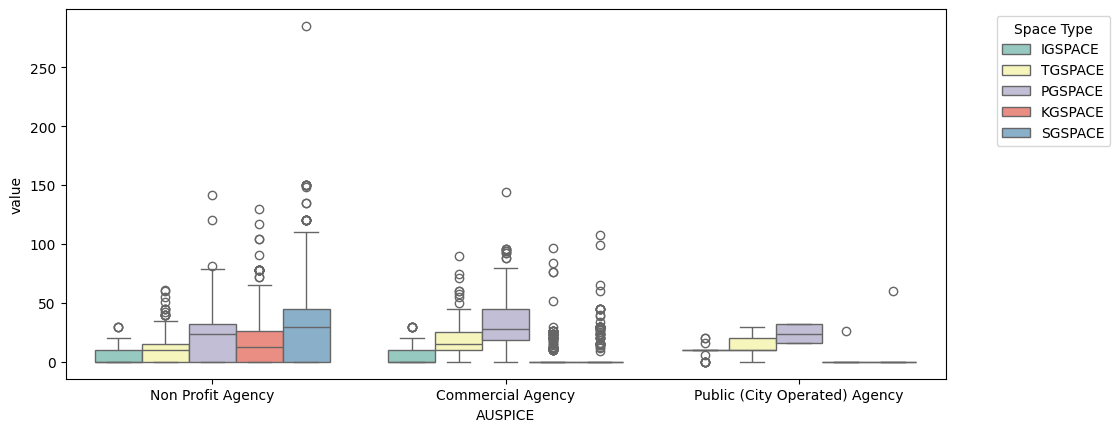

In [13]:
# Create the boxplot
sns.boxplot(x="AUSPICE", y="value", hue="space_type",data=df_melt, palette="Set3")

# Move the legend to the right of the plot
plt.legend(title='Space Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the subplot params to give some space for the legend outside the plot
plt.subplots_adjust(right=1.5)

plt.show()

In [14]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(AUSPICE) + C(space_type) + C(AUSPICE):C(space_type)', data=df_melt).fit()

# Two-way ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),1.922242e+04,2.0,29.104369,2.685589e-13
C(space_type),2.821233e+05,4.0,213.579208,3.726614e-170
C(AUSPICE):C(space_type),2.206458e+05,8.0,83.519093,9.972931e-131
Residual,1.750233e+06,5300.0,NaN,NaN


In [15]:
# Performs ANOVA to evaluate the significance of 'AUSPICE', 'space_type', and their interaction on 'value'
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(AUSPICE) + C(space_type) + C(AUSPICE):C(space_type)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,1.922242e+04,9611.211429,29.104369,2.685589e-13
C(space_type),4.0,2.821233e+05,70530.816839,213.579208,3.726614e-170
C(AUSPICE):C(space_type),8.0,2.206458e+05,27580.726915,83.519093,9.972931e-131
Residual,5300.0,1.750233e+06,330.232598,NaN,NaN


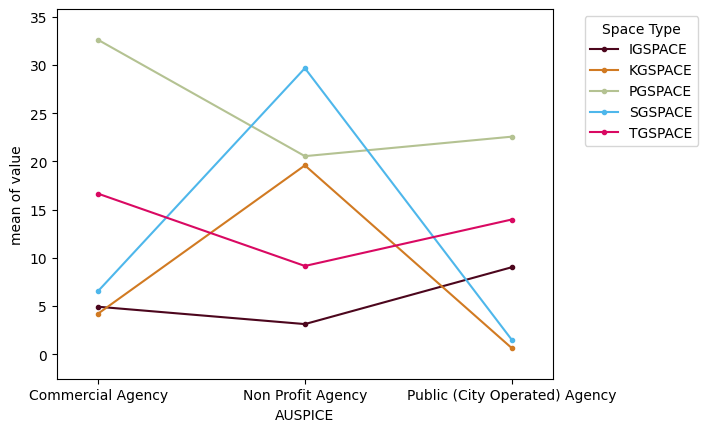

In [16]:
# Generates an interaction plot for 'AUSPICE' and 'space_type' effects on 'value'
fig = interaction_plot(x=df_melt['AUSPICE'], trace=df_melt['space_type'], response=df_melt['value'],
                       colors=['#4c061d','#d17a22','#b4c292', '#4eb7eb', '#d90962'])

# Move the legend to the right of the plot
plt.legend(title='Space Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the subplot params to give some space for the legend outside the plot
plt.subplots_adjust(right=0.9)

plt.show()

In [17]:
# Performs Tukey's HSD post-hoc test on 'AUSPICE' group means
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='AUSPICE',
              anova_model='value ~ C(AUSPICE) + C(space_type) + C(AUSPICE):C(space_type)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,3.423883,2.140456,4.707311,8.844824,0.001000
1,Non Profit Agency,Public (City Operated) Agency,6.866922,3.732600,10.001244,7.263738,0.001000
2,Commercial Agency,Public (City Operated) Agency,3.443039,0.212180,6.673898,3.533178,0.033472


In [18]:
# Performs Tukey's HSD post-hoc test on 'space_type' group means
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='space_type',
              anova_model='value ~ C(AUSPICE) + C(space_type) + C(AUSPICE):C(space_type)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,IGSPACE,TGSPACE,7.703669,5.552803,9.854535,13.821471,0.001000
1,IGSPACE,PGSPACE,20.362183,18.211316,22.513049,36.532634,0.001000
2,IGSPACE,KGSPACE,10.361242,8.210376,12.512108,18.589533,0.001000
3,IGSPACE,SGSPACE,17.764817,15.613951,19.915683,31.872592,0.001000
4,TGSPACE,PGSPACE,12.658514,10.507648,14.809380,22.711163,0.001000
5,TGSPACE,KGSPACE,2.657573,0.506707,4.808439,4.768062,0.006750
6,TGSPACE,SGSPACE,10.061148,7.910282,12.212014,18.051121,0.001000
7,PGSPACE,KGSPACE,10.000941,7.850075,12.151807,17.943102,0.001000
8,PGSPACE,SGSPACE,2.597366,0.446500,4.748232,4.660042,0.008773
9,KGSPACE,SGSPACE,7.403575,5.252709,9.554441,13.283060,0.001000


In [19]:
# Performs Tukey's HSD post-hoc test on 'AUSPICE' and 'space_type' group means
res.tukey_hsd(df=df_melt, res_var='value', xfac_var=['AUSPICE', 'space_type'],
              anova_model='value ~ C(AUSPICE) + C(space_type) + C(AUSPICE):C(space_type)')
res.tukey_summary.head()

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, IGSPACE)","(Non Profit Agency, TGSPACE)",6.024182,2.735427,9.312937,8.789533,0.001
1,"(Non Profit Agency, IGSPACE)","(Non Profit Agency, PGSPACE)",17.408250,14.119495,20.697006,25.399362,0.001
2,"(Non Profit Agency, IGSPACE)","(Non Profit Agency, KGSPACE)",16.452347,13.163592,19.741102,24.004660,0.001
3,"(Non Profit Agency, IGSPACE)","(Non Profit Agency, SGSPACE)",26.529161,23.240405,29.817916,38.707151,0.001
4,"(Non Profit Agency, IGSPACE)","(Commercial Agency, IGSPACE)",1.796599,-2.356899,5.950098,2.075566,0.900
